# San Francisco - Exploratory Data Analysis

**Project:** A Tale of Two Cities - Comparative Public Safety Analysis

**Data Source:** DataSF - SFPD Incident Reports (2018 to Present)  

---

## Overview

This notebook performs exploratory analysis on **pre-processed** San Francisco crime data, focusing on:
- **Temporal Patterns:** Hourly, daily, and weekly crime trends
- **Spatial Distribution:** Geographic patterns and district analysis
- **Categorical Insights:** Crime type distributions and correlations

**Note:** Data preprocessing is handled in `01_data_preparation_sf.ipynb`

---

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

# Set plotting style
sns.set_style("whitegrid")

## 1. Load Pre-processed Data

**Important:** Run `01_data_preparation_sf.ipynb` first to generate the clean dataset.

This notebook loads the already-cleaned data with all temporal features ready for analysis.

In [26]:
# Load the pre-cleaned San Francisco data
df = pd.read_csv('../data/processed/sf_incidents_cleaned.csv', 
                 index_col='Incident DateTime', 
                 parse_dates=True)

print(f"Dataset loaded: {len(df):,} rows, {len(df.columns)} columns")
print(f"Date range: {df.index.min()} to {df.index.max()}")

# Display first few rows
df.head()

Dataset loaded: 918,118 rows, 33 columns
Date range: 2018-01-01 00:00:00 to 2025-10-12 21:04:00


,Row ID,Incident Year,Incident Day of Week,Report Datetime,Incident ID,Incident Number,Report Type Code,Report Type Description,Incident Code,Incident Category,...,data_loaded_at,Hour,Day,Month,Year,Day of Week,Day of Week Name,Month Name,Quarter,Is Weekend
Incident DateTime,,,,,,,,,,,,,,,,,,,,,
2025-08-27 00:37:00,150752104134,2025,Wednesday,2025/08/27 12:37:00 AM,1507521,250479881,II,Initial,4134,Assault,...,2025/08/29 09:53:03 AM,0,27,8,2025,2,Wednesday,August,3,0
2025-07-17 15:00:00,150762309027,2025,Thursday,2025/08/27 11:55:00 AM,1507623,250480775,II,Initial,9027,Fraud,...,2025/08/29 09:53:03 AM,15,17,7,2025,3,Thursday,July,3,0
2025-08-23 21:30:00,150740506244,2025,Saturday,2025/08/24 02:53:00 PM,1507405,256091227,II,Coplogic Initial,6244,Larceny Theft,...,2025/08/28 09:53:00 AM,21,23,8,2025,5,Saturday,August,3,1
2025-08-15 12:00:00,150723571000,2025,Friday,2025/08/24 07:10:00 PM,1507235,256090348,II,Coplogic Initial,71000,Lost Property,...,2025/08/28 09:53:00 AM,12,15,8,2025,4,Friday,August,3,0
2025-08-15 21:45:00,150594207026,2025,Friday,2025/08/16 10:39:00 AM,1505942,250454651,VS,Vehicle Supplement,7026,Motor Vehicle Theft,...,2025/08/28 09:53:00 AM,21,15,8,2025,4,Friday,August,3,0


In [27]:
# Quick data overview
print("\n" + "="*60)
print("DATASET SUMMARY")
print("="*60)
print(f"Total Incidents: {len(df):,}")
print(f"Columns: {len(df.columns)}")
print(f"Date Range: {df.index.min().date()} to {df.index.max().date()}")
print(f"Missing Values: {df.isnull().sum().sum()}")
print("\nColumn Names:")
print(df.columns.tolist())

# Display basic statistics
df.describe()


DATASET SUMMARY
Total Incidents: 918,118
Columns: 33
Date Range: 2018-01-01 to 2025-10-12
Missing Values: 0

Column Names:
['Row ID', 'Incident Year', 'Incident Day of Week', 'Report Datetime', 'Incident ID', 'Incident Number', 'Report Type Code', 'Report Type Description', 'Incident Code', 'Incident Category', 'Incident Subcategory', 'Incident Description', 'Resolution', 'Intersection', 'CNN', 'Police District', 'Analysis Neighborhood', 'Supervisor District', 'Supervisor District 2012', 'Latitude', 'Longitude', 'Point', 'data_as_of', 'data_loaded_at', 'Hour', 'Day', 'Month', 'Year', 'Day of Week', 'Day of Week Name', 'Month Name', 'Quarter', 'Is Weekend']


,Row ID,Incident Year,Incident ID,Incident Number,Incident Code,CNN,Supervisor District,Supervisor District 2012,Latitude,Longitude,Hour,Day,Month,Year,Day of Week,Quarter,Is Weekend
count,9.181180e+05,918118.000000,9.181180e+05,9.181180e+05,918118.000000,9.181180e+05,918118.000000,918118.000000,918118.000000,918118.000000,918118.000000,918118.000000,918118.000000,918118.000000,918118.000000,918118.000000,918118.000000
mean,1.071523e+11,2021.163938,1.071523e+06,2.131157e+08,24332.111951,2.577552e+07,5.980449,6.019739,37.768926,-122.423852,12.891513,15.587715,6.420385,2021.163938,2.966854,2.477887,0.270101
std,2.598186e+10,2.213254,2.598186e+05,2.238108e+07,25374.915453,4.946601e+06,2.807216,2.794029,0.024417,0.026253,6.489817,8.871548,3.405544,2.213254,1.967832,1.104453,0.444012
min,6.186910e+10,2018.000000,6.186910e+05,0.000000e+00,1000.000000,2.001300e+07,1.000000,1.000000,37.708256,-122.511940,0.000000,1.000000,1.000000,2018.000000,0.000000,1.000000,0.000000
25%,8.468085e+10,2019.000000,8.468082e+05,1.908185e+08,6244.000000,2.395000e+07,3.000000,3.000000,37.753956,-122.434319,9.000000,8.000000,3.000000,2019.000000,1.000000,1.000000,0.000000
50%,1.070947e+11,2021.000000,1.070947e+06,2.106831e+08,7051.000000,2.492900e+07,6.000000,6.000000,37.775799,-122.417709,14.000000,16.000000,6.000000,2021.000000,3.000000,2.000000,0.000000
75%,1.297299e+11,2023.000000,1.297299e+06,2.305717e+08,28160.000000,2.649200e+07,9.000000,9.000000,37.785583,-122.407394,18.000000,23.000000,9.000000,2023.000000,5.000000,3.000000,1.000000
max,1.518392e+11,2025.000000,1.518392e+06,9.901103e+08,75030.000000,5.441200e+07,11.000000,11.000000,37.830055,-122.366287,23.000000,31.000000,12.000000,2025.000000,6.000000,4.000000,1.000000


## 2. Exploratory Data Analysis

The clean dataset already contains temporal features (Hour, Month, Day of Week, etc.). We'll now analyze patterns across three dimensions:

- **Temporal Analysis** - When do crimes occur?
- **Spatial Analysis** - Where do crimes concentrate?
- **Categorical Analysis** - What types of crimes are most common?

### 2.1 Temporal Analysis: Hourly Crime Patterns

**Research Question:** At what times of day do incidents peak?

This analysis reveals daily crime cycles and can help inform resource allocation for law enforcement.

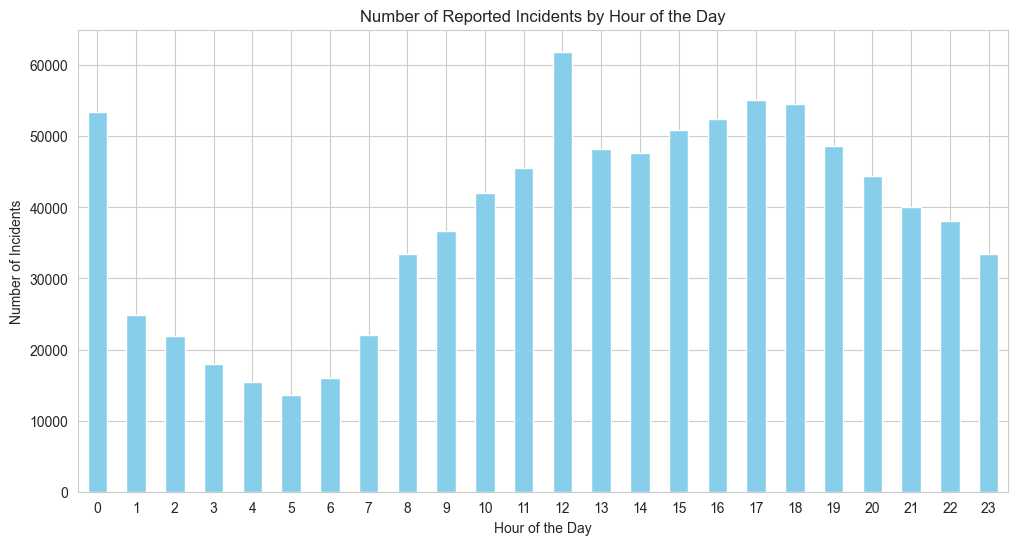

In [28]:
# Group by hour and count the number of incidents
hourly_crimes = df.groupby('Hour').size()

# Create the plot
plt.figure(figsize=(12, 6))
hourly_crimes.plot(kind='bar', color='skyblue')

# Add titles and labels for clarity
plt.title('Number of Reported Incidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=0) # Keep the x-axis labels horizontal

# Show the plot
plt.show()

### 2.2 Temporal Analysis: Day-of-Week Patterns

**Research Question:** Are there significant differences in crime rates across different days of the week?

Understanding weekly patterns helps identify if crime is influenced by weekday vs. weekend dynamics.

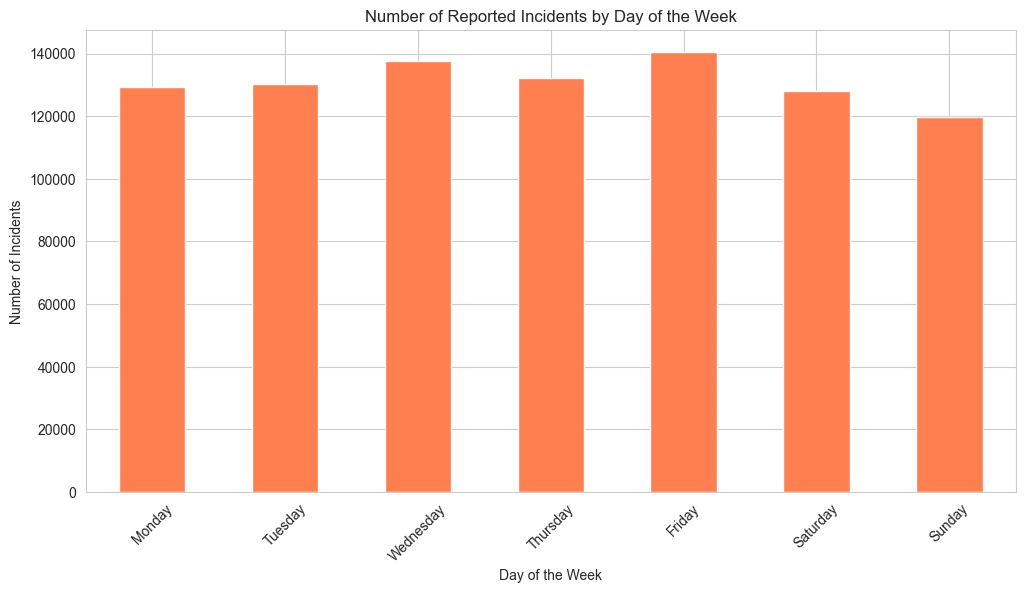

In [29]:
# Group by day of the week and count the number of incidents
daily_crimes = df.groupby('Day of Week Name').size()

# Create a list of the days in the correct order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_crimes = daily_crimes.reindex(day_order)

# Create the plot
plt.figure(figsize=(12, 6))
daily_crimes.plot(kind='bar', color='coral')

# Add titles and labels for clarity
plt.title('Number of Reported Incidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45) # Rotate labels to prevent overlap

# Show the plot
plt.show()

### 2.3 Spatial Analysis: Crime by Police District

**Research Question:** Which police districts experience the highest crime rates?

This geographic analysis identifies high-burden districts that may require additional resources or targeted interventions.

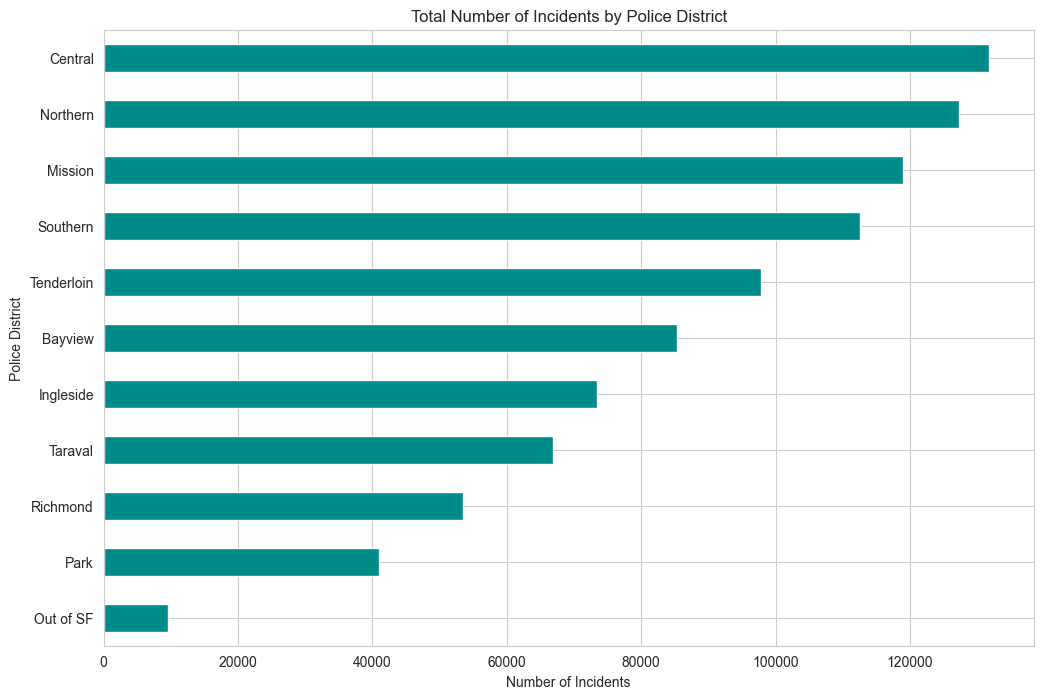

In [30]:
# Group by police district and count the number of incidents
district_crimes = df['Police District'].value_counts()

# Create the plot
plt.figure(figsize=(12, 8))
district_crimes.plot(kind='barh', color='darkcyan') # Using a horizontal bar chart for readability

# Add titles and labels for clarity
plt.title('Total Number of Incidents by Police District')
plt.xlabel('Number of Incidents')
plt.ylabel('Police District')

# Invert y-axis to have the district with the most incidents on top
plt.gca().invert_yaxis()

# Show the plot
plt.show()

### 2.4 Categorical Analysis: Most Common Crime Types

**Research Question:** What are the most frequently reported incident categories?

Understanding crime type distribution helps prioritize prevention strategies and resource allocation.

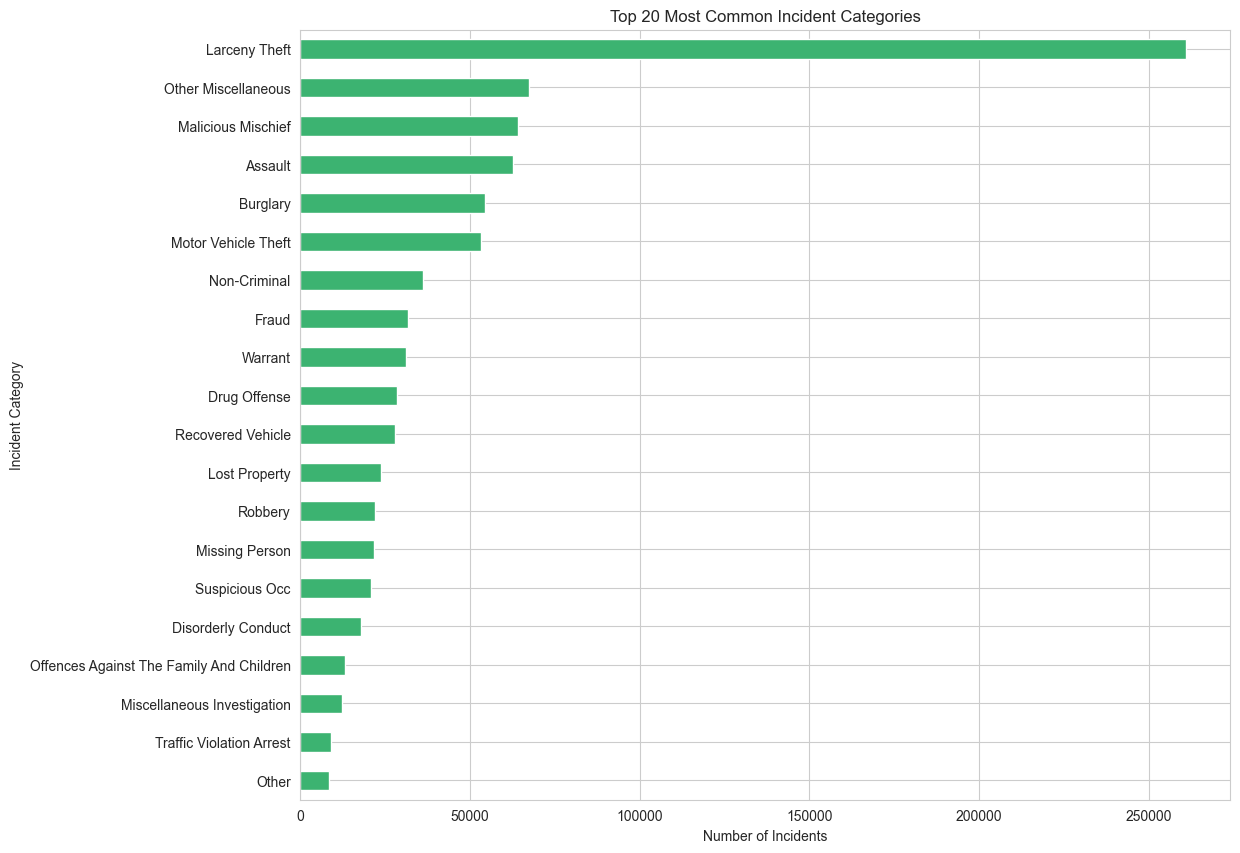

In [31]:
# Group by incident category and count the number of incidents
# We'll look at the top 20 for a clean visualization
top_crimes = df['Incident Category'].value_counts().nlargest(20)

# Create the plot
plt.figure(figsize=(12, 10))
top_crimes.plot(kind='barh', color='mediumseagreen')

# Add titles and labels for clarity
plt.title('Top 20 Most Common Incident Categories')
plt.xlabel('Number of Incidents')
plt.ylabel('Incident Category')

# Invert y-axis to have the most common category on top
plt.gca().invert_yaxis()

# Show the plot
plt.show()

### 2.5 Integrated Analysis: Crime Profile by District

**Research Question:** How do crime types vary across the busiest police districts?

This integrated categorical-spatial analysis reveals district-specific crime signatures and helps identify localized prevention strategies.

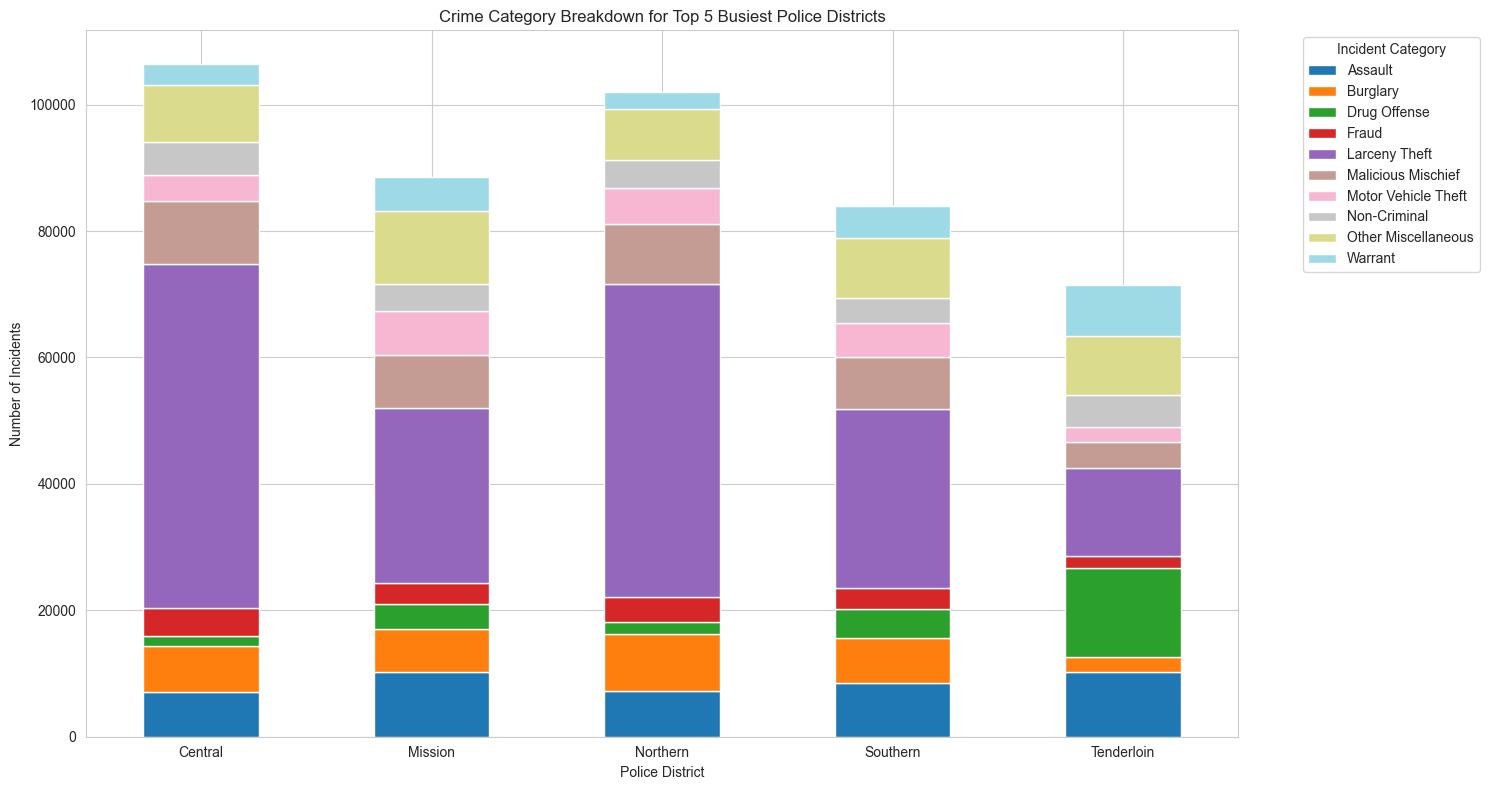

In [32]:
# Find the top 5 busiest police districts
top_districts = df['Police District'].value_counts().nlargest(5).index

# Filter the DataFrame to only include incidents from these top districts
df_top_districts = df[df['Police District'].isin(top_districts)]

# We will focus on the top 10 most common crimes overall for a cleaner plot
top_crimes_overall = df['Incident Category'].value_counts().nlargest(10).index
df_top_crimes_and_districts = df_top_districts[df_top_districts['Incident Category'].isin(top_crimes_overall)]

# Create a cross-tabulation to count crime categories within each top district
crime_profile = pd.crosstab(df_top_crimes_and_districts['Police District'], df_top_crimes_and_districts['Incident Category'])

# Create the plot
crime_profile.plot(kind='bar', stacked=True, figsize=(15, 8), cmap='tab20')

# Add titles and labels for clarity
plt.title('Crime Category Breakdown for Top 5 Busiest Police Districts')
plt.xlabel('Police District')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=0)
plt.legend(title='Incident Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

### 2.6 Integrated Temporal-Categorical Analysis

**Research Question:** How do the top crime categories vary throughout the day?

This critical temporal analysis reveals when specific crime types peak, enabling time-and-category-specific intervention strategies.

<Figure size 1500x800 with 0 Axes>

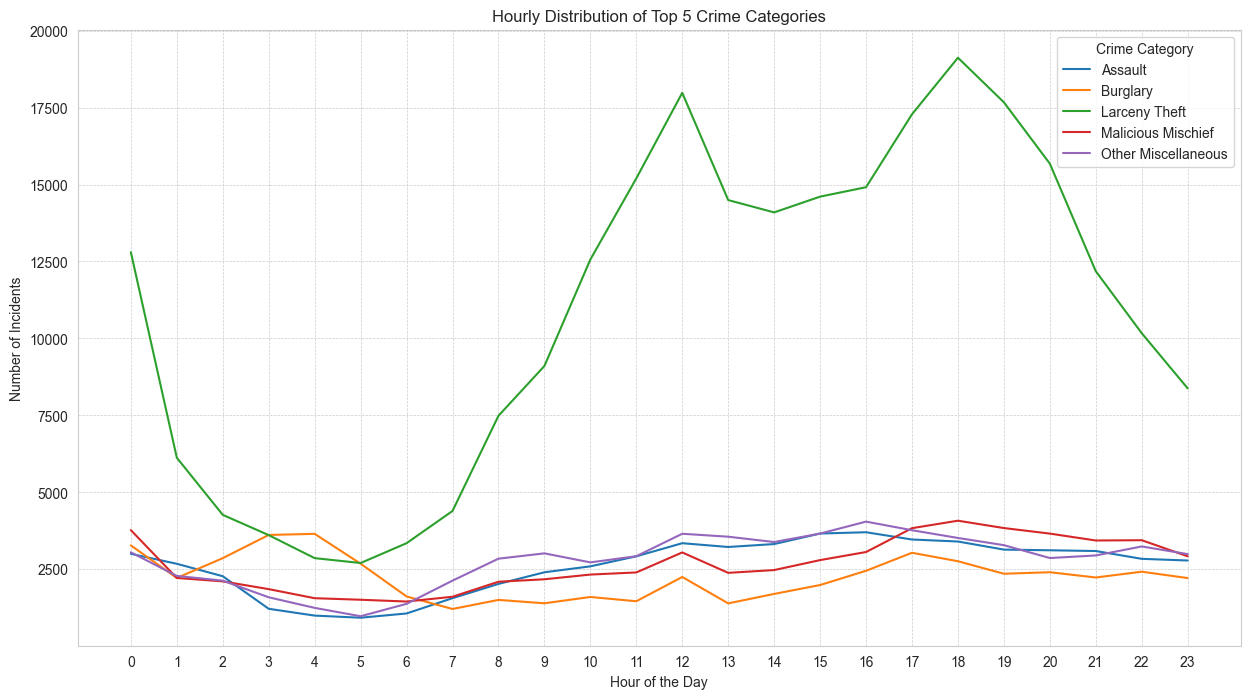

In [33]:
# Identify the top 5 most common crime categories
top_5_crimes = df['Incident Category'].value_counts().nlargest(5).index

# Filter the DataFrame to only include incidents from these top 5 categories
df_top_5 = df[df['Incident Category'].isin(top_5_crimes)]

# Group by both incident category and hour, then count the incidents
crime_hourly_trends = df_top_5.groupby(['Incident Category', 'Hour']).size().unstack(level=0)

# Create the line plot
plt.figure(figsize=(15, 8))
crime_hourly_trends.plot(kind='line', figsize=(15, 8), subplots=False)

# Add titles and labels for clarity
plt.title('Hourly Distribution of Top 5 Crime Categories')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Incidents')
plt.xticks(range(0, 24)) # Ensure all hours are marked on the x-axis
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title='Crime Category')

# Show the plot
plt.show()

### 2.7 Spatial Visualization: Crime Heatmap

**Research Question:** Where are crime incidents geographically concentrated in San Francisco?

Using geospatial visualization, we can identify crime hotspots and understand the geographic distribution of incidents across the city.

In [34]:
# Create a sample of 10,000 incidents for faster map rendering
df_sample = df.sample(n=10000)

# Create a base map centered on San Francisco
sf_map = folium.Map(location=[37.77, -122.42], zoom_start=12)

# Create a list of latitude/longitude points from the sample
heat_data = [[row['Latitude'], row['Longitude']] for index, row in df_sample.iterrows()]

# Add the heatmap layer to the base map
HeatMap(heat_data).add_to(sf_map)

# Display the map
sf_map

## 3. Key Findings

### Summary of Insights:
- **Temporal Patterns:** Crime incidents show distinct hourly and daily patterns
- **Spatial Concentration:** Certain districts bear disproportionate crime burden
- **Crime Type Distribution:** Specific categories dominate the incident landscape
- **Integrated Insights:** Time-space-category interactions reveal actionable patterns
- **Actionable Insights:** Identified peak crime hours and high-risk districts for targeted interventions